In [2]:
pip install mysql-connector-python

     -------------------------------------- 14.3/14.3 MB 495.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip list

In [1]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='(confidential)',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/HP/Downloads/Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host='localhost',
    username='root',
    password='ManojMysql@123',
    database='ecommerce'
)
cur = db.cursor()

# Easy SQL

## List all unique cities where customers are located.

In [2]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()
# data

df = pd.DataFrame(data, columns=["Country"])
df.head()

,Country
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


## Count the number of order placed in 2017

In [3]:
query = """ select count(order_id) from orders 
where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 135303)

## Find the total sales per category

In [4]:
query = """ select upper(products.product_category) category,
round(sum(payments.payment_value), 2) sales
from products join order_items
on products.product_id = order_items.product_id 
join payments
on payments.order_id = order_items.order_id
group by category """

# as sum() aggregate func is used therefore, group by is used to seperate according to category.
# we joined products and payment using common table order_items.
# freight value(Shipping cost) is added to price of product.

cur.execute(query)

data = cur.fetchall()
data
# below code to convert into dataframe

[('PERFUMERY', 13681943.82),
 ('FURNITURE DECORATION', 38614762.58),
 ('TELEPHONY', 13145815.37),
 ('BED TABLE BATH', 46238949.12),
 ('AUTOMOTIVE', 23011946.94),
 ('COMPUTER ACCESSORIES', 42803922.05),
 ('HOUSEWARES', 29558469.52),
 ('BABIES', 14575832.81),
 ('TOYS', 16714017.62),
 ('FURNITURE OFFICE', 17464315.15),
 ('COOL STUFF', 21051846.0),
 ('HEALTH BEAUTY', 44749074.22),
 ('PET SHOP', 8404262.2),
 ('GENERAL INTEREST BOOKS', 1746758.51),
 ('STATIONARY STORE', 8570881.88),
 ('WATCHES PRESENT', 38588850.32),
 ('PCS', 7536281.83),
 ('CLIMATIZATION', 2461607.81),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 6519842.02),
 ('SPORT LEISURE', 37587444.1),
 ('BAGS ACCESSORIES', 5053084.84),
 ('ELECTRONICS', 7016141.69),
 ('CASA CONSTRUCAO', 3689422.84),
 ('GAMES CONSOLES', 5277970.24),
 ('FASHION BAGS AND ACCESSORIES', 5890273.56),
 ('HOME APPLIANCES', 2579371.29),
 ('GARDEN TOOLS', 22633580.27),
 ('AGRO INDUSTRIA E COMERCIO', 3205726.48),
 (None, 6825646.17),
 ('AUDIO', 1628764.74),
 ('TECHNICAL 

In [22]:
# to convert into dataframe
df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,PERFUMERY,4053909.28
1,FURNITURE DECORATION,11441411.13
2,TELEPHONY,3895056.41
3,BED TABLE BATH,13700429.37
4,AUTOMOTIVE,6818354.65
...,...,...
69,CDS MUSIC DVDS,9595.44
70,LA CUISINE,23308.24
71,FASHION CHILDREN'S CLOTHING,6285.36
72,PC GAMER,17395.44


## Calculate the percentage of orders that were paid in installments.

In [26]:
query = """ select (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100 from payments"""

# count(*) = counts the total number of records (or orders) in the payments table.

cur.execute(query)

data = cur.fetchall()
"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

## Count the number of customers from each city.

In [2]:
query = """ select upper(customer_city), count(customer_id)
from customers group by customer_city """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["City", "No. of Cust"])
df

,City,No. of Cust
0,FRANCA,483
1,SAO BERNARDO DO CAMPO,2814
2,SAO PAULO,46620
3,MOGI DAS CRUZES,1149
4,CAMPINAS,4332
...,...,...
4114,SIRIJI,3
4115,NATIVIDADE DA SERRA,3
4116,MONTE BONITO,3
4117,SAO RAFAEL,3


In [33]:
df = pd.DataFrame(data, columns=("City", "Customer_Count"))
df
df[df.columns[0]].count()

4119

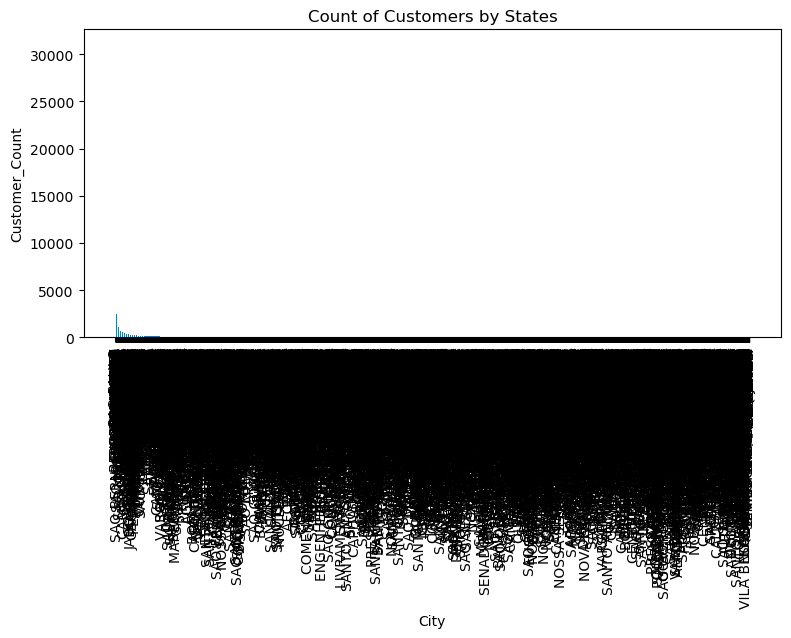

In [36]:
df = df.sort_values(by = "Customer_Count", ascending=False)

plt.figure(figsize=(9,4))
plt.bar(df["City"], df["Customer_Count"])
plt.xticks(rotation = 90)
plt.xlabel("City")
plt.ylabel("Customer_Count")
plt.title("Count of Customers by City")
plt.show()

# graph show the graph of city and not state

## Above problem using states

In [37]:
query = """ select upper(customer_state), count(customer_id)
from customers group by customer_state """

cur.execute(query)

data = cur.fetchall()
data

[('SP', 83492),
 ('SC', 7274),
 ('MG', 23270),
 ('PR', 10090),
 ('RJ', 25704),
 ('RS', 10932),
 ('PA', 1950),
 ('GO', 4040),
 ('ES', 4066),
 ('BA', 6760),
 ('MA', 1494),
 ('MS', 1430),
 ('CE', 2672),
 ('DF', 4280),
 ('RN', 970),
 ('PE', 3304),
 ('MT', 1814),
 ('AM', 296),
 ('AP', 136),
 ('AL', 826),
 ('RO', 506),
 ('PB', 1072),
 ('TO', 560),
 ('PI', 990),
 ('AC', 162),
 ('SE', 700),
 ('RR', 92)]

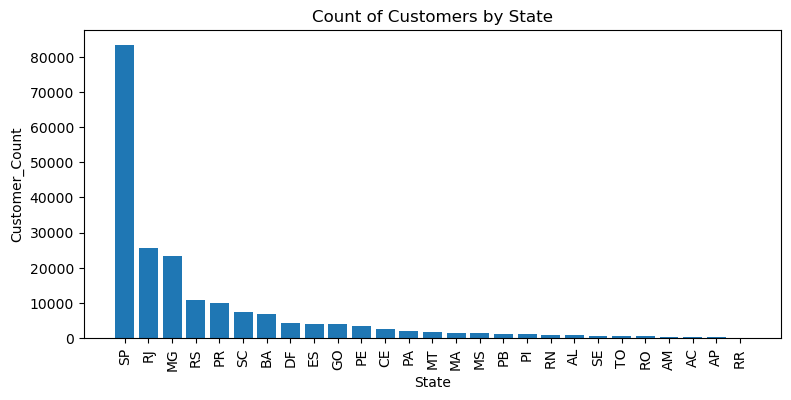

In [38]:
df = pd.DataFrame(data, columns=("State", "Customer_Count"))
df = df.sort_values(by = "Customer_Count", ascending=False)

plt.figure(figsize=(9,4))
plt.bar(df["State"], df["Customer_Count"])
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Customer_Count")
plt.title("Count of Customers by State")
plt.show()

# This graph show the graph of state

# Intermediate SQL

## Calculate the number of orders per month in 2018

In [5]:
query = """ select monthname(order_purchase_timestamp) months,
count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months"""

cur.execute(query)

data = cur.fetchall()
data

[('July', 18876),
 ('August', 19536),
 ('February', 20184),
 ('June', 18501),
 ('March', 21633),
 ('January', 21807),
 ('May', 20619),
 ('April', 20817),
 ('September', 48),
 ('October', 12)]

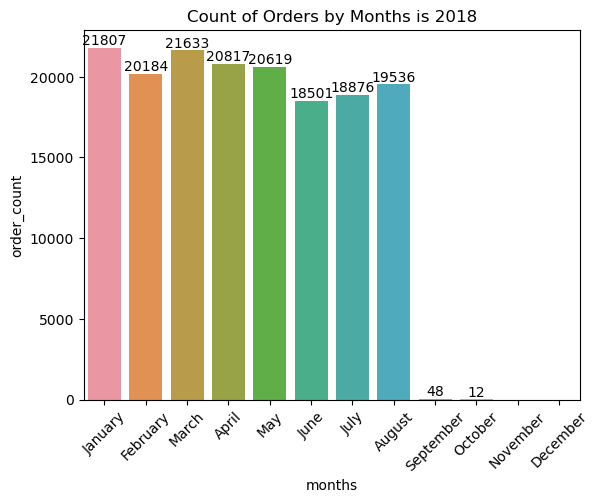

In [7]:
df = pd.DataFrame(data, columns=["months", "order_count"])
o = ["January" ,"February" , "March" , "April" ,"May" , "June", 
     "July" , "August", "September", "October", "November", "December"]

ax = sns.barplot(x = df["months"], y = df["order_count"], 
                 data = df, order = o)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")
plt.show()

## Find the average number of products per order, grouped by customer city.

In [45]:
query = """ with count_per_order as 
(select orders.order_id, orders.customer_id, 
count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, 
round(avg(count_per_order.oc), 2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

# CTE(Common Table Expression) is a powerful SQL construct that helps simplify queries.
# CTEs act as virtual tables (with records and columns) that are created during query execution.

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["customer city", "average products/order"])
df.head(10)

,customer city,average products/order
0,padre carvalho,28.00
1,celso ramos,26.00
2,datas,24.00
3,candido godoi,24.00
4,matias olimpio,20.00
5,cidelandia,16.00
6,curralinho,16.00
7,picarra,16.00
8,morro de sao paulo,16.00
9,teixeira soares,16.00


## Calculate the percentage of total revenue contributed by each product category

In [48]:
query = """ select upper(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100, 2)
sales_percentage
from products join order_items
on products.product_id = order_items.product_id 
join payments
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["Category", "Percentage distribution"])
df
# plt.pie(df["Percentage distribution"], labels=df["Category"])
# plt.show()

,Category,Percentage distribution
0,BED TABLE BATH,42.79
1,HEALTH BEAUTY,41.41
2,COMPUTER ACCESSORIES,39.61
3,FURNITURE DECORATION,35.73
4,WATCHES PRESENT,35.71
...,...,...
69,PC GAMER,0.05
70,HOUSE COMFORT 2,0.04
71,CDS MUSIC DVDS,0.03
72,FASHION CHILDREN'S CLOTHING,0.02


## Identify the correlation btw product price and the number of times a product has been purchased

In [9]:
query = """ select upper(products.product_category),
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category;
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["Category", "Order_count", "Avg_Price"])
df

,Category,Order_count,Avg_Price
0,HEALTH BEAUTY,87030,130.16
1,SPORT LEISURE,77769,114.34
2,COOL STUFF,34164,167.36
3,COMPUTER ACCESSORIES,70443,116.51
4,WATCHES PRESENT,53919,201.14
...,...,...,...
69,FLOWERS,297,33.64
70,KITCHEN PORTABLE AND FOOD COACH,135,264.57
71,CITTE AND UPHACK FURNITURE,342,114.95
72,HOUSE COMFORT 2,270,25.34


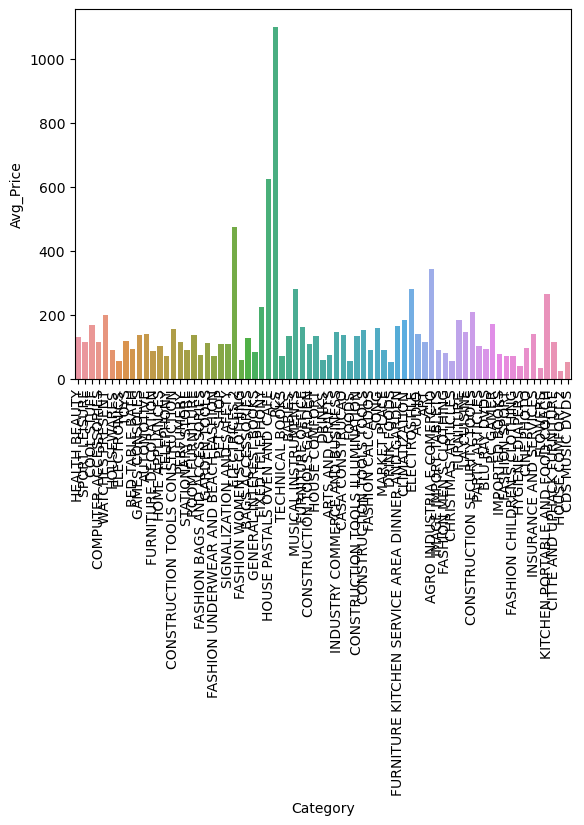

In [24]:
sns.barplot(x="Category", y="Avg_Price", data=df)
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(24.267, 239.94]'),
  Text(1, 0, '(239.94, 454.54]'),
  Text(2, 0, '(454.54, 669.14]'),
  Text(3, 0, '(669.14, 883.74]'),
  Text(4, 0, '(883.74, 1098.34]')])

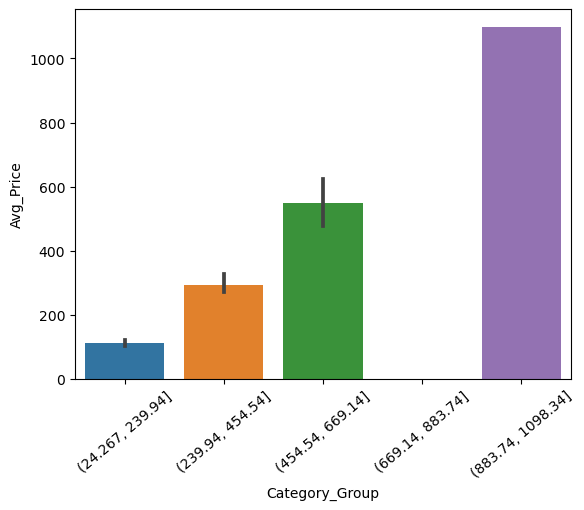

In [28]:
df['Category_Group'] = pd.cut(df['Avg_Price'], bins=5)
ax = sns.barplot(x='Category_Group', y='Avg_Price', data=df)
plt.xticks(rotation=40)

In [10]:
# Now, to find corr btw price and order_count
import numpy as np
arr1 = df["Order_count"]
arr2 = df["Avg_Price"]

a = np.corrcoef([arr1, arr2])
# so we can see their is no relation btw both (no proportionality)
print("The corr btw price and no. of times a product has been purchased is ", round(a[0][1],2))

The corr btw price and no. of times a product has been purchased is  -0.11


## Calculate the total revenue generated by each seller, and rank them by revenue

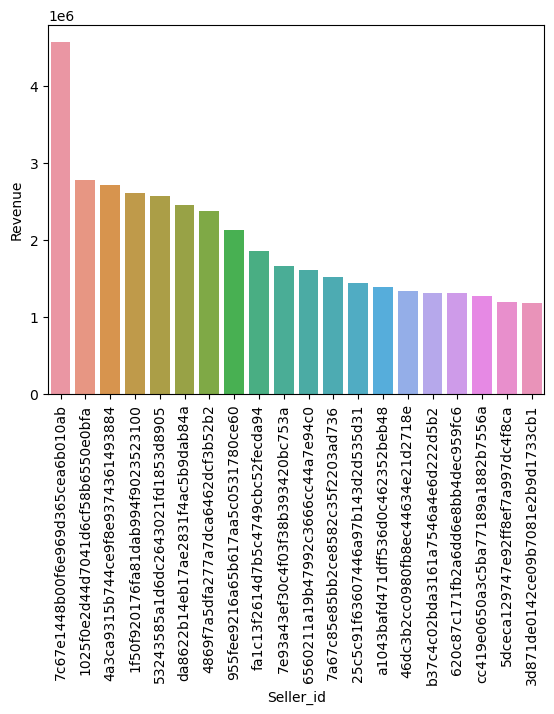

In [29]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id,
sum(payments.payment_value) revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a;
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["Seller_id", "Revenue", "Rank"])
df = df.head(20)
sns.barplot(x = "Seller_id", y = "Revenue", data = df)
plt.xticks(rotation=90)
plt.show()

# Advance SQL

## Calculate the moving average of order values for each customer over their order history.

In [73]:
# moving avg, running total, cumulative sales, year over year growth,
# month over month growth. are important question for interview.

In [7]:
# moving avg = avg of same cust buying products over time

query = """ select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a;
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["cust_id", "order_date", "price", "avg"])
df

,cust_id,order_date,price,avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
934969,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934970,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934971,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934972,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


## Calculate the cumulative sales per month for each year

In [12]:
query = ''' select years, months, payment, sum(payment)
over(order by years, months) cumulative_sales
from
(select year(orders.order_purchase_timestamp) as years,
monthname(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years) as a;
'''

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Year", "Month", "Price", "Cumulative_Price"])
df

,Year,Month,Price,Cumulative_Price
0,2016,December,176.58,1.765800e+02
1,2016,October,531814.32,5.319909e+05
2,2016,September,2270.16,5.342611e+05
3,2017,April,3760092.27,4.294353e+06
4,2017,August,6069566.88,1.036392e+07
5,2017,December,7905613.32,1.826953e+07
6,2017,February,2627172.09,2.089671e+07
7,2017,January,1246392.36,2.214310e+07
8,2017,July,5331446.28,2.747454e+07
9,2017,June,4601487.42,3.207603e+07


## Calculate the year-over-year growth rate of total sales.

In [4]:
query = ''' with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payments
from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

-- select years, payments, lag(payments, 1) over(order by years) from a
select years, payments, ((payments-lag(payments,1) over(order by years))/
lag(payments, 1) over(order by years)) * 100 from a
'''
# year-over-year formula
# (current sales-previous sales)/(previous year sales)

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Years','Sales', "yoy growth(%)"])
df

,Years,Sales,yoy growth(%)
0,2016,534261.06,NaN
1,2017,65247720.55,12112.703758
2,2018,78297867.47,20.000924


## Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [7]:
query = ''' with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by a.customer_id)

select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id;
'''

cur.execute(query)
data = cur.fetchall()
data
# df = pd.DataFrame(data, columns=['Years','Sales', "yoy growth(%)"])
# df

# Since none of our customer have purchased within 6 months 
# of their first purchase

[(None,)]

## Identify the top 3 customers who spent the most money in each year

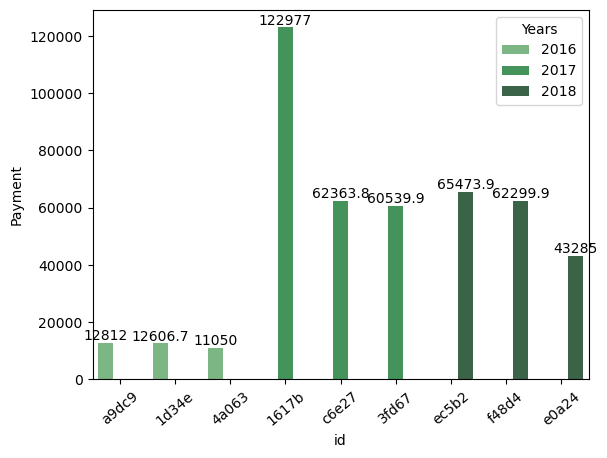

In [36]:
query = ''' select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <=3;
'''

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Years', 'id', 'Payment', 'Rank'])
ax = sns.barplot(x='id', y='Payment', data=df, hue='Years', palette = "Greens_d")
for container in ax.containers:
    ax.bar_label(container)
ax.set_xticklabels([label[:5] for label in df['id']], rotation=40)
# plt.xticks(rotation=90)
plt.show()